## Praca domowa 3
### Temat Analiza opinii o energii nuklearnej
#### Grzegorz Grygorowicz

Już od jakiegoś czasu są rozmowy na temat energii nuklearnej, zbudza mieszane uczucia, nie który sądzą, że jest nie dobra dla otoczenia a nie którzy wręcz przeciwnie. Jakie emocje wywowała decyzja Niemiec, czy podejście do tego tematu Francji. Celem tej pracy jest analiza tweetów używających hashtagu "#nuclearenergy"

Pobranie tweetów za pomocą snscrape.

Zakres dat jest od grudnia 2022 do kwietnia 2023 (Niemcy zamykają elektrownie atomowe). Pobranie ok 150 tweetów na dzień, o ile tle było danego dnia.

Tweety z danego miesiąca są zapisywane w pliku csv o nazwe nuclearenergy-Tweets-[miesiąc]-[rok]

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import date
from datetime import timedelta
import os

def GrabTweets(month,year,num_tweets_per_day,query):
    if month in [1, 3, 5, 7, 8, 10, 12]:
        days_in_month = 31
        total_tweets = days_in_month * num_tweets_per_day

    elif month in [4, 6, 9, 11]:
        days_in_month = 30
        total_tweets = days_in_month * num_tweets_per_day

    elif month == 2:
        days_in_month = 28
        total_tweets = days_in_month * num_tweets_per_day


    tweets_list = []

    until = date(year, month, 2).isoformat()
    since = date(year, month, 1).isoformat()

    counter = 0

    while counter != total_tweets:
        for i,tweet in enumerate(sntwitter.TwitterHashtagScraper('{} since:{} until:{} lang:en'.format(query,since,until)).get_items()):
            if i >= num_tweets_per_day:
                until = (date.fromisoformat(until) + timedelta(days=1)).isoformat()
                since = (date.fromisoformat(since) + timedelta(days=1)).isoformat()
                break
            tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount])
            counter += 1


    DF = pd.DataFrame(tweets_list, columns=['Date', 'Tweet ID', 'Text', 'Username', 'Reply Count', 'Retweet Count', 'Like Count', 'Quote Count'])
    
    os.chdir('D:/studia/IO/aiart_opinion/csvs')
    
    DF.to_csv('{}-Tweets-{}-{}.csv'.format(query,month,year), encoding='utf-8', index=False)
    
    print("Done!")


Wczytanie tweetów - z plików.

In [8]:
import pandas as pd

a1 = pd.read_csv('csvs/nuclearenergy-Tweets-1-2023.csv')
a2 = pd.read_csv('csvs/nuclearenergy-Tweets-2-2023.csv')
a3 = pd.read_csv('csvs/nuclearenergy-Tweets-3-2023.csv')
a4 = pd.read_csv('csvs/nuclearenergy-Tweets-4-2023.csv')
a12 = pd.read_csv('csvs/nuclearenergy-Tweets-12-2022.csv')

all_tweets = a1['Text'].tolist() + a2['Text'].tolist() + a3['Text'].tolist() + a4['Text'].tolist() + a12['Text'].tolist()
dece_tweets = a1['Text'].tolist()


Tokenizacja tweetów przy użyciu nltk

In [28]:
import nltk

tokenized_tweets = []
for tweet in all_tweets:
    tokenized_tweet = nltk.word_tokenize(tweet.lower())
    tokenized_tweets.append(tokenized_tweet)

Filtrowanie tweetów

In [89]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('#')
stop_words.add('~')
stop_words.add('-')
stop_words.add(':')
stop_words.add('https')
stop_words.add('//t.co/ZTrU7v2OEf')
stop_words.add('?')
stop_words.add('24/7')
stop_words.add('@')
stop_words.add(',')
stop_words.add('.')
stop_words.add('!')
stop_words.add(';')
stop_words.add('$')
stop_words.add('&')
stop_words.add("'s")
stop_words.add(')')
stop_words.add('(')
stop_words.add("'")
stop_words.add('"')
stop_words.add('’')
stop_words.add("''")
stop_words.add('``')
stop_words.add("'m")
stop_words.add('*')
stop_words.add('...')
stop_words.add('u')
stop_words.add('|')
stop_words.add('..')
stop_words.add('”')
stop_words.add('“')
stop_words.add('%')
stop_words.add("'re")
stop_words.add("nuclearenergy")



filtered_tweets = []
filtered_tweets = [[word for word in tweet if word not in stop_words] for tweet in tokenized_tweets]


Lemanizacja tweetów

In [90]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(filtered_tweets[:4])

lemmatized_tweets = [[lemmatizer.lemmatize(word) for word in tweet] for tweet in filtered_tweets]


[['used', 'nuclear', 'fuel', 'dr', 'james', 'conca', 'part', 'two', '//t.co/ztru7v2oef', 'serious', 'climate', 'get', 'serious', 'reliable', 'ultra', 'low', 'co2', 'electricity', 'thorium', 'small', 'modular', 'reactors', 'smr', 'amp'], ['thetruthpanther', 'size', 'sa', 'economy', 'fuelled', 'sustained', 'coal', 'energy', 'throw', 'nuclear', 'energy', 'mix'], ['ninaturner', 'fact', 'ur', 'stumping', 'nuclear', 'energy', 'cartoon', 'irony', 'lost'], ['used', 'nuclear', 'fuel', 'w/', 'dr.', 'james', 'conca', 'part', 'one', '//t.co/sguwle8y3g', 'get', 'serious', 'climate', 'get', 'serious', 'reliability', 'ultra', 'low', 'co2', 'electricity', 'thorium', 'smr']]


Najczęstsze słowa w tweetach

[['used', 'nuclear', 'fuel', 'dr', 'james', 'conca', 'part', 'two', '//t.co/ztru7v2oef', 'serious', 'climate', 'get', 'serious', 'reliable', 'ultra', 'low', 'co2', 'electricity', 'thorium', 'small', 'modular', 'reactor', 'smr', 'amp'], ['thetruthpanther', 'size', 'sa', 'economy', 'fuelled', 'sustained', 'coal', 'energy', 'throw', 'nuclear', 'energy', 'mix'], ['ninaturner', 'fact', 'ur', 'stumping', 'nuclear', 'energy', 'cartoon', 'irony', 'lost'], ['used', 'nuclear', 'fuel', 'w/', 'dr.', 'james', 'conca', 'part', 'one', '//t.co/sguwle8y3g', 'get', 'serious', 'climate', 'get', 'serious', 'reliability', 'ultra', 'low', 'co2', 'electricity', 'thorium', 'smr']]
[('nuclear', 26335), ('energy', 25636), ('power', 2792), ('need', 2388), ('amp', 2376), ("n't", 2128), ('fuel', 1688), ('clean', 1523), ('reactor', 1476), ('climate', 1467)]


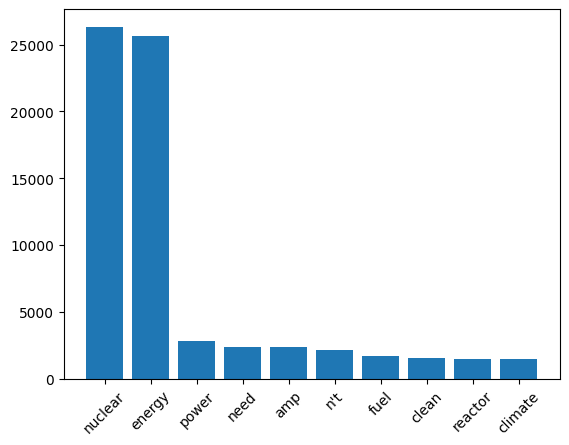

In [91]:
from collections import Counter
import matplotlib.pyplot as plt

#word_counts = Counter(lemmatized_tweets)
print(lemmatized_tweets[:4])
flattened_words = [word for tweet in lemmatized_tweets for word in tweet]

word_count = Counter(flattened_words)
#only_words_before_fame = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_before_fame for word in tweet["text"]]
#word_count_before_fame = Counter(only_words_before_fame)



most_common = word_count.most_common(10)
print(most_common)
labels, values = zip(*most_common)
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.show()

Najwięcej użyto słów takich jak nuclear, energy, power, need, amp, not, fuel, clean, reactor i climate.

Analiza emocji za pomocą narzędzia nltk vader

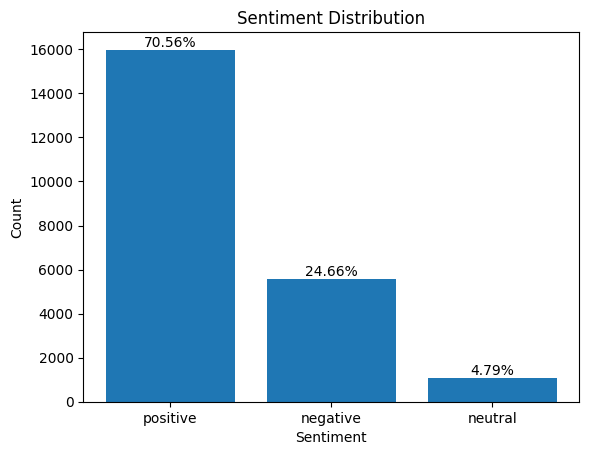

In [93]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

positive = []
negative = []
neutral = []

for tweet in all_tweets:
        score = sid.polarity_scores(tweet)
        if score['compound'] > 0:
            positive.append(tweet)
        elif score["compound"] < 0:
            negative.append(tweet)
        else:
            neutral.append(tweet)

numbers = [len(positive), len(negative), len(neutral)]
labels = ['positive', 'negative', 'neutral']

plt.bar(labels, numbers)
for i, num in enumerate(numbers):
    percentage = str(round(num/len(all_tweets) * 100, 2)) + "%"
    plt.text(i, num, percentage, ha='center', va='bottom')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()


Jak można zauważyć przy sprawdzeniu każdego tweeta, wychodzi, że ok 71% jest pozytywnie nastawiona, ok 25% negatywnie i ok 5% neutralnie.

Analiza emocji za pomocą narzędzia text2emotion

In [95]:
import text2emotion as te

emotion_results = { "Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0 }
emotion_tweets = []
for tweet in all_tweets:
    tweet_emotions = te.get_emotion(tweet)
    dominating_emotion = max(tweet_emotions, key=tweet_emotions.get)
    emotion_results[dominating_emotion] += 1
    
numbers = [emotion_results["Happy"], emotion_results["Angry"], emotion_results["Surprise"], emotion_results["Sad"], emotion_results["Fear"]]
labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

plt.bar(labels, numbers)
for i, num in enumerate(numbers):
    percentage = str(round(num/len(all_tweets) * 100, 1)) + "%"
    plt.text(i, num, percentage, ha='center', va='bottom')

plt.title('Text2Emotion Analysis')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


KeyboardInterrupt: 

Chmura słów

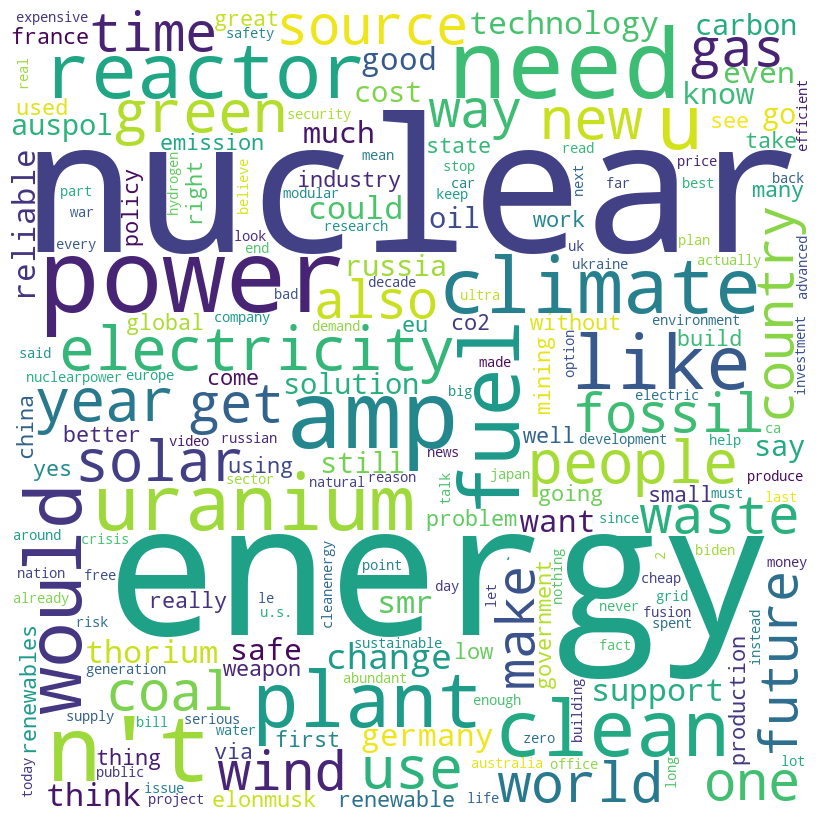

In [92]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_count)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Słowa tutaj występujące są raczej zgodnie z oczekiwaniami poza Elon Musk.

In [ ]:
g = a12['Text'].tolist()
s = a1['Text'].tolist()
l = a2['Text'].tolist()
m = a3['Text'].tolist()
k = a4['Text'].tolist()

In [ ]:
def vaderEmotion(tw, month):
    sid = SentimentIntensityAnalyzer()

    positive = []
    negative = []
    neutral = []

    for tweet in tw:
            score = sid.polarity_scores(tweet)
            if score['compound'] > 0:
                positive.append(tweet)
            elif score["compound"] < 0:
                negative.append(tweet)
            else:
                neutral.append(tweet)

    numbers = [len(positive), len(negative), len(neutral)]
    labels = ['positive', 'negative', 'neutral']

    plt.bar(labels, numbers)
    for i, num in enumerate(numbers):
        percentage = str(round(num/len(tw) * 100, 2)) + "%"
        plt.text(i, num, percentage, ha='center', va='bottom')

    plt.title('Sentiment Distribution' + month)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

    plt.show()

vaderEmotion(g, "December")
vaderEmotion(s, "January")
vaderEmotion(l, "Febuary")
vaderEmotion(m, "March")
vaderEmotion(k, "April")

In [ ]:
def t2e(allt, month):
    emotion_results = { "Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0 }
    emotion_tweets = []
    for tweet in allt:
        tweet_emotions = te.get_emotion(tweet)
        dominating_emotion = max(tweet_emotions, key=tweet_emotions.get)
        emotion_results[dominating_emotion] += 1
        
    numbers = [emotion_results["Happy"], emotion_results["Angry"], emotion_results["Surprise"], emotion_results["Sad"], emotion_results["Fear"]]
    labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

    plt.bar(labels, numbers)
    for i, num in enumerate(numbers):
        percentage = str(round(num/len(allt) * 100, 1)) + "%"
        plt.text(i, num, percentage, ha='center', va='bottom')

    plt.title('Text2Emotion Analysis' + month)
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

t2e(g, "December")
t2e(s, "January")
t2e(l, "Febuary")
t2e(m, "March")
t2e(k, "April")